# Google Fushion Tables with Shapes

(Demo by Yi Yang)

Data visualization examples partially modified from [Fusion Tables Intensity Maps with Custom Shapes](http://www.padjo.org/tutorials/mapping/fusion-table-shapes/) by Dan Nguyen.

**Download this dataset as a CSV**: [APD crime incident reports 2015](https://docs.google.com/spreadsheets/d/1u4E83ytTPpWFwAV_r7I0X4NQFgQ9k30Avf2oyUtVU80/edit?usp=sharing)

## Introduction

In the previous Fusion Tables tutorial, we saw how to visualize crime incident data points to a map, using latitude and longitude coordinates.

In this tutorial, we will aggregate the point statistics to specific regions. We will be adding polygons to a map, and visualize these regions. We'll also use a few other of Fusion Tables's mapping options, which let us use "buckets" of numerical data to determine the color of a shape (you can use buckets for points too, to determine which icon is used).

## Obtaining KML

KML stands for Keyhole Markup Language and is one of the shapefile formats that Fusion Tables understands. It contains a series of latitude and longitude coordinate pairs, each representing a part of the overall shape or boundary. More about KML and other shape formats: [So you want to make a map](https://github.com/veltman/learninglunches/tree/master/maps)

The APD dataset provides NPU (Neighborhood planning unit) information for each incident. We can obtain the NPU shapefile from: http://gis.atlantaga.gov/apps/gislayers/download/

We need to convert the shapefile to KML, which I achieved by using: http://www.mapsdata.co.uk/online-file-converter/

Let's go back to Fashion Tables and import the KML. We may want to save the data as csv, [here is what I got](https://www.google.com/fusiontables/DataSource?docid=1dK9jzTd1ZMZhfDkKCRLlDyfeovcVaRCdsTbBqY2X).

## NPU lever statistics

Let's aggregate the incident points to the number of crime incidents of each NPU region per month.

In [4]:
import csv
# obtain NPU level crime statistics
npu_inci = {}
with open("ATL-crime-2015.csv", "rb") as f:
    reader = csv.reader(f)
    reader.next()
    for row in reader:
        date, npu = row[2], row[5]
        month = int(date[:date.find("/")])
        if npu not in npu_inci: 
            npu_inci[npu] = [0 for i in range(12)]
        npu_inci[npu][month-1] += 1

# write csv file
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
with open("NPU.csv", "rb") as fi, open("NPU-crime.csv", "w") as fo:
    reader, writer = csv.reader(fi), csv.writer(fo)
    row = reader.next()
    header = [row[7], row[-1]] # only keep NPU and geometry columns
    header += months
    writer.writerow(header)
    for row in reader:
        newrow = [row[7], row[-1]]
        if row[7] not in npu_inci: continue
        newrow += npu_inci[row[7]]
        writer.writerow(newrow)

## Mapping the data

Import the new csv file. FT will use the Polygon column, in which we've stored the KML data, as the default column to map.

We will now be working inside the **Change map feature styles** menu. In the previous tutorial, we configured the **Points > Marker icon** setting. Now, we will work with **Polygons**.

### Buckets

Buckets allow us to visualize different regions with different colors according to some numerical values. The step by step instruction is as following:

1. Open the **Change map feature styles** menu
2. Select **Polygons > Fill color**
3. Select the **Buckets** tab
4. Select **Divide into 6 buckets**
5. Change the data column to **Jan** (or whatever you want). This should give you the range of values (0 - 300). Select **use this range**
6. Configure a couple buckets with corresponding colors
7. Hit **Save**

Here are the configuration and the resulting map.

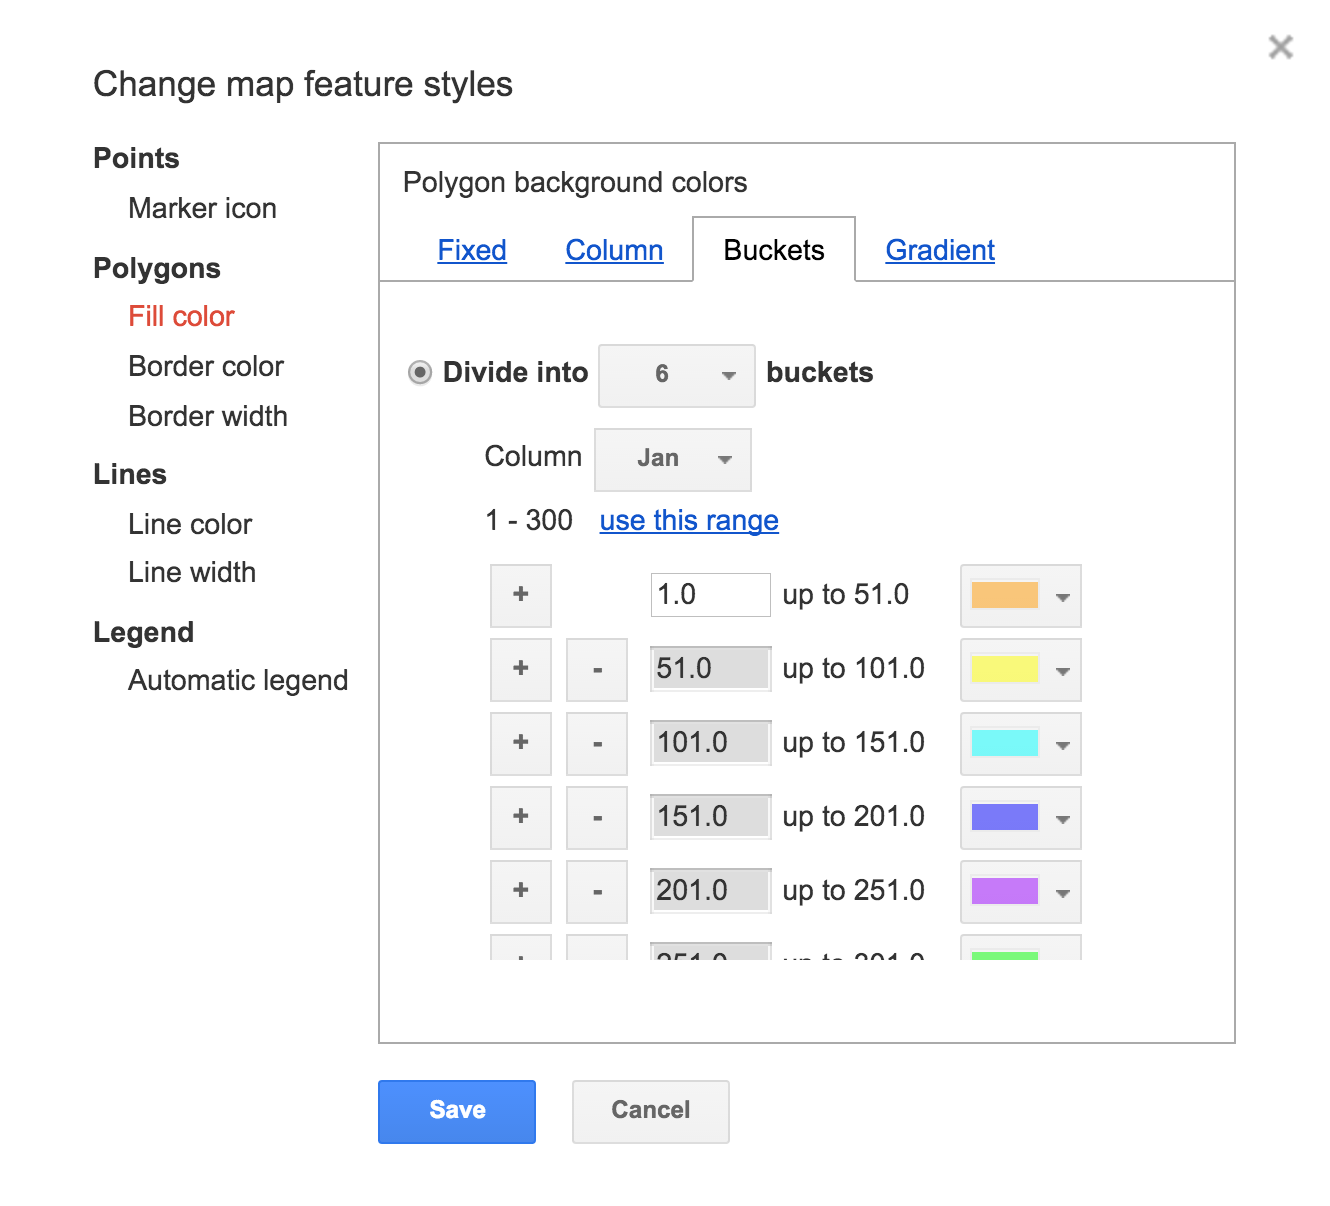

In [7]:
from IPython.display import Image
Image("config.png")

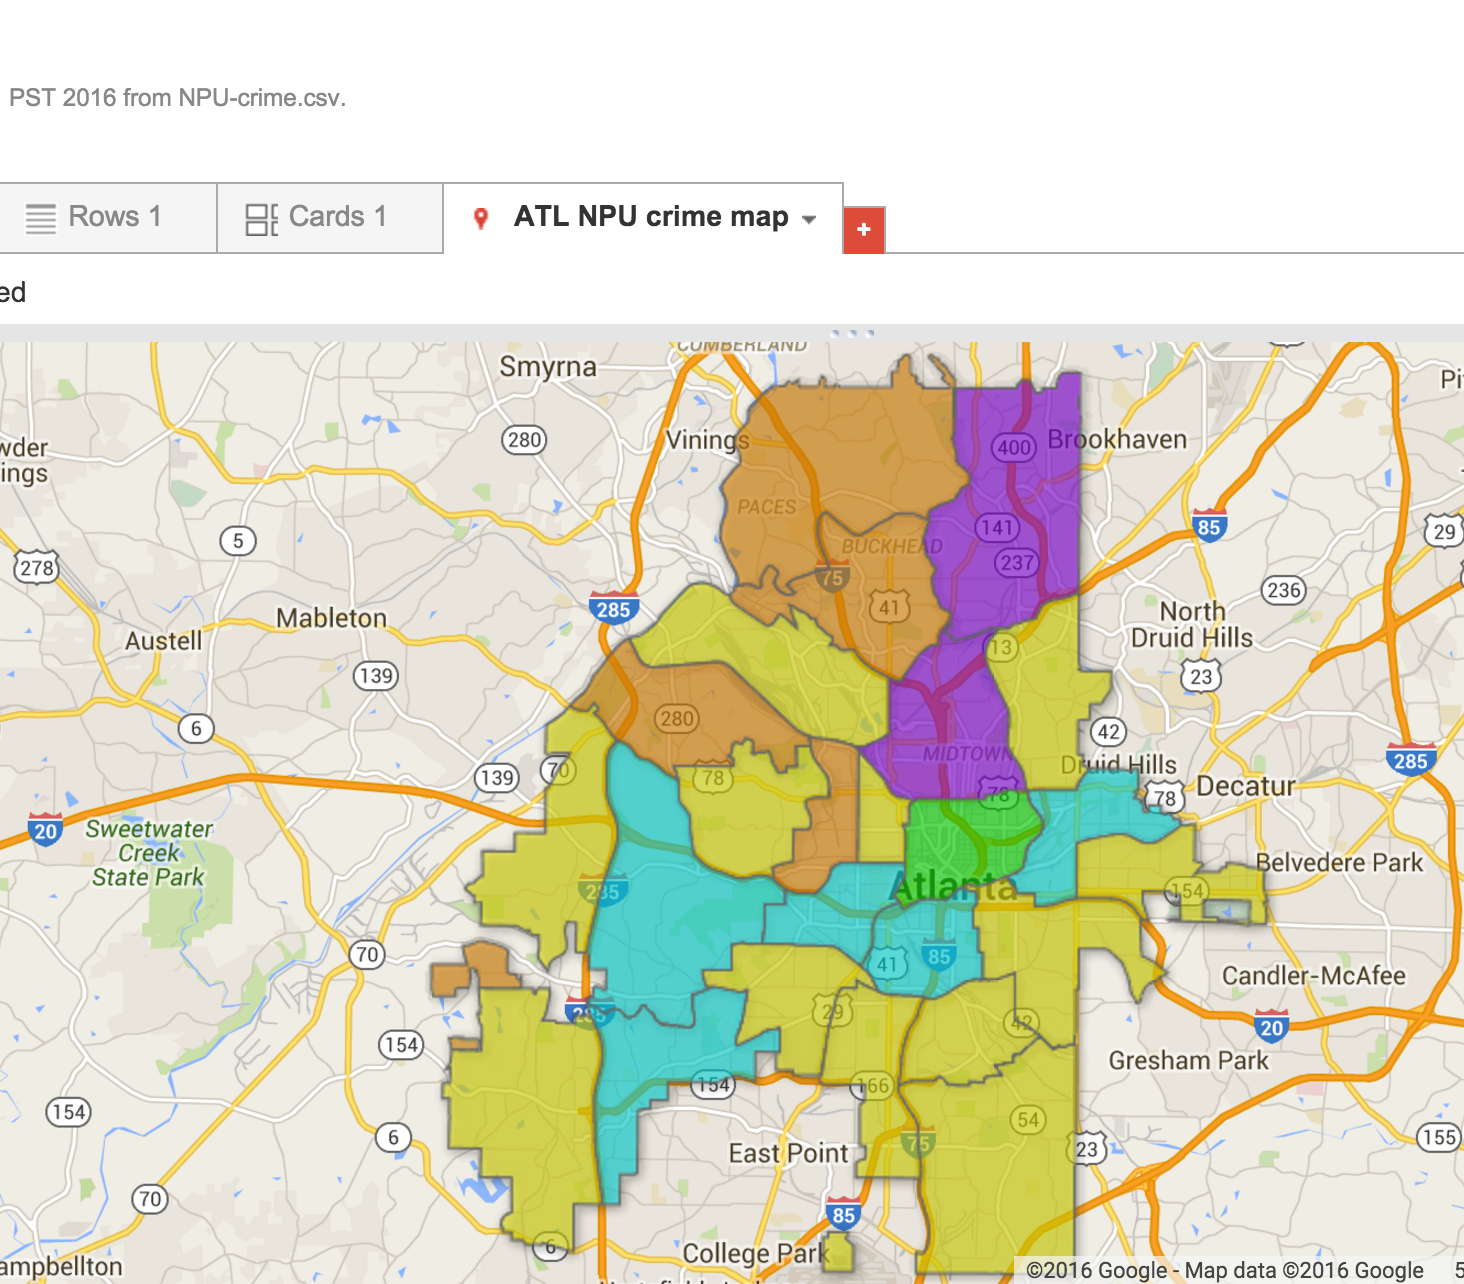

In [8]:
Image("map.png")

You can find my published map [here](https://www.google.com/fusiontables/DataSource?docid=1QlNRcb6D5vkGGA92td8SWOtjClet8MHzpygUw6r4).